# Exercise 9 GEO2010 - Discharge Estimates and Flow Duration Curve

## Exercise 9.1: Rating curve measured at Bergheim in 2010 and 2011

**<font color='blue'>
Reference material: Dingman 3rd ed., p.589-94, Appendix E.6
</font>**

**Theory**

A rating curve describes the relationship between discharge and water stage. When the water stage is high, the discharge is high. When the water stage is 0, the discharge is 0. Therefore, the rating curve starts at the point (0,0). 

The rating curve is made by measuring water flow and water stages at the same point in time. This happens maybe once a year, so it takes a long time to accumulate many points to the curve. When the curve has some points (more than 3, and preferably more than 10) a curve fitted to the points is made. 

This curve is given by the formula

$$Q = a \cdot H^b$$

where 

 $Q$discharge [m<sup>3</sup> s<sup>-1</sup>] (plotted on the ordinate) <br />
 $H$ water stage [m] (plotted on the abscissa) <br />
 $a,b$ constants

**<font color='blue'>
See also Dingman 3rd ed., p.592, equation E.17
</font>**

You will have to plot the rating curve by using the H-values and calculate the corresponding Q-values. Then you will have to plot the discharge and water stages that were measured. Finally, you will need to check whether the data fits the curve.

Next problem is the water stage, which can be expressed in absolute height (i.e. in terms of altitude [m]). However, we are interested in local water stages. To find this you must subtract the leveling point from the water stages. You have to subtract this number from all the measurements of local water stages before plotting. 


**Exercise**

NVE performs annual controls at their discharge gauging stations. The control consists of three parts: leveling, discharge measurement and flushing the cistern between the river and the stilling well. A technician made discharge measurements at Bergheim, and provided the following results: 

 The measured discharge was 189.3 m<sup>3</sup> s<sup>-1</sup> in 2010 and 56 m<sup>3</sup> s<sup>-1</sup> in 2011. <br />
 The measured stage (water level) was 152.47 meters a.s.l. in 2010 and 151.64 meters a.s.l. in 2011.

a) Describe and justify the location requirements of the measurement site for discharge measurements.

 **Answers (see page 590 in Dingman):**

<span style="color:green"> 
**Stage $Z$ should be measured where it is sensitive to discharge variation, i.e. where $ dZ_S/dQ$ is relatively large, and where $Z$ can be measured accurately, usually to within 3 mm. These conditions are usually found where the water is relatively quiet, i.e. without a lot of waves. $ dZ_s/dQ$  should be large in order to produce a good resolution of the discharge measurement. IF $ dZ_S/dQ$  is small, it will be difficult to read off changes in discharge from the staff gauge (the ruler-like object used to measure $Z_s$).<span> 



b) Discuss sources of uncertainty when determining extremely small and extremely large discharges.


<span style="color:green"> The stage-discharge curve is based on observations made from medium-.heigh flows, because at very low or very high flows, it may be difficult to perform representative measurements. At very low measurements, the stage may be on the same order of magnitude as the resolution of the staff gauge, and at very high outflows, it could be difficult to get to the gauging station, or the water might flow over or around the weir plate. 

<span style="color:green"> 
The uncertainty increases when one extrapolates from the range of outflow rates on which the rating curve is based.
<span>


c) Plot the rating curve of Bergheim. Then, plot the data we measured: stage (water level) [m] against the discharge [m<sup>3</sup> s<sup>-1</sup>]. Does the measurement fit the rating curve?

At Bergheim, the values of the rating curve parameters are 

 a = 30.7223 <br />
 b = 2.386 <br />
 H (local height) = water level [m] (absolute height) - 150.3 m a.s.l. (levelling point)

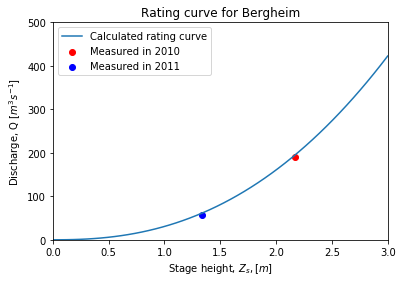

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab 
# Declare constants:
a = 30.7223
b = 2.386
MASL = 150.3

# Create an array of stages with length equal to nH:
Hmax = 3 # meters
Hmin = 0  # meters
nH = 50
H = np.linspace(Hmin,Hmax,nH)



Q2010 = 189.3    #m^3s^-1
H2010 = 152.47-MASL    #m

Q2011 = 56    #m^3s^-1
H2011 = 151.64-MASL    #m

Q = a*H**b

plt.plot(H,Q,label = 'Calculated rating curve')
plt.scatter(H2010,Q2010,c='r',label='Measured in 2010')
plt.scatter(H2011,Q2011,c='b',label='Measured in 2011')
plt.xlim(0,Hmax)
plt.ylim(0,500)
plt.xlabel('Stage height, $Z_s, [m]$')
plt.ylabel('Discharge, Q [$m^3s^{-1}$]')
plt.title('Rating curve for Bergheim')
plt.legend(loc='upper left', scatterpoints = 1)
plt.show()


<span style="color:green"> We see that the measurements fit the curve well.<span>





## Exercise 9.2: Flow calculation with the salt dilution method

**<font color='blue'>
Reference material: <br />
 Dingman 3rd ed., p.585-86, Appendix E.4 <br />
 *Teori_saltmåling.pdf* <br />
 *salt_dilution_streamline_vol7_no4_art5.pdf* <br />
</font>**

The exercise text this week is given as an excursion guide to a discharge measurement using the salt dilution method. We are going to make a corresponding measurement on excursion in May. The data in *DataGaustadbekken.xls* is from a measurement performed in Gaustadbekken in Spring 2008.

The aim is to estimate the discharge in a small, turbulent stream by measuring the concentration of salt about 100 meters downstream, before and after we added a saline solution. The concentration of salt can be found by measuring the electrical conductivity of water with an electrolyte. The conductivity is proportional to the salt concentration, so the concentration is calculated from the conductivity data.

First, we measured the background conductivity in Gaustadbekken, cond<sub>b</sub> = 74 μS cm<sup>-1</sup>. Then we added 2.8 kg of salt to 25 liters of water, so the water got a conductivity cond<sub>T</sub> = 84 000 μS cm<sup>-1</sup>. We ignored the increase in water volume as a result of the added salt. The water temperature was 4.2°C.

All the salt was added at the same time into the river (gulp injection), and two students measured the conductivity 100 meters downstream (see Excel sheet). The first 11 measurements were taken every 5 seconds, then every 10 seconds until the conductivity was back to its background value.


The discharge was then calculated using the formula

$$Q = \frac{(cond_T-cond_b) \cdot V_T}{\sum_{0}^{\infty} \Delta \cdot t'}
$$

where 

- $Q$ is the discharge [l s<sup>-1</sup>] <br />
- $V_T$ is the volume of injected tracer solution [l] <br />
- $cond_T$ is the conductivity of the tracer solution [μS cm<sup>-1</sup>] <br />
- $cond_b$ is the natural background conductivity of the tracer (i.e. salt) in the solution [μS cm<sup>-1</sup>] <br />
- $\Delta$ is the change in conductivity between conductivity measured at the downstream site at time $t_i$ and background conductivity $cond_b$ [μS cm<sup>-1</sup>] <br />
- $t'$ is the  time interval between two succeeding measurements (i.e. $t’$ = $t_i$-$t_{i-1}$)

**<font color='blue'>
See also Dingman 3rd ed., p.586, equation E.14
</font>**

a) What is the discharge in l s<sup>-1</sup> ?

<span style="color:red">
**NB! NB! This is just a sugested solution. The following calculations have not been quality assured. If you get a different result, you may or may not be right.**
<span>


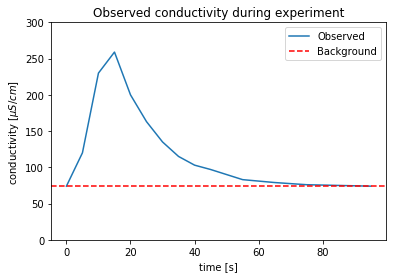

The discharge is: 526.5 l/s


In [3]:
import xlrd
from openpyxl import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read the file:
data = xlrd.open_workbook('DataGaustadbekken.xls') 
# Read the first sheet:
ws = data.sheet_by_index(0)

tracerCond = ws.cell(4,2).value    
tracerVolume = ws.cell(5,2).value

# Write a function that reads data from a range of cells 
#(either I am stupid, or there is no such function in the ordinary libraries):
def read_xls_colRange(worksheet, rowStart, rowEnd, col):
    """
    This function reads a range of cells in a column in worksheet.
    """    
    ws = worksheet
    #Declare an empty range that we will fill and then return:
    cellVal = np.zeros(rowEnd-rowStart+1)
    #Set the row range, add 1 to rowEnd because of the configuration
    #of the RANGE function
    rowRange = range(rowStart,rowEnd+1)
    #Read the data:
    for row in rowRange:
            cellVal[row-rowStart]=ws.cell(row,col).value
    return cellVal

#Read the data:
time = read_xls_colRange(ws,10,25,2)
cond = read_xls_colRange(ws,10,25,4)

#set the background conductivity:
backgroundCond = cond[0]

#Plot the conductivity as a function of time:
plt.plot(time,cond, label = "Observed")
#Ad a line with the background:
plt.axhline(y=backgroundCond, linestyle ='dashed', 
            color ='red',label='Background')

plt.legend(loc='upper right')
plt.title('Observed conductivity during experiment')
plt.xlabel('time [s]')
plt.ylabel("conductivity [${\mu}S/cm$] ")
plt.ylim(0,300)
plt.show()

#calculate the time steps:
delta_time = time[1:]-time[0:-1]
#Calculate the difference between the conductivity and the background conductivity:
delta_cond = cond-backgroundCond

#Integrate the difference in time:
cond_integrated = sum(delta_cond[1:]*delta_time)

#Calculate the discharge:
Q = (tracerCond-backgroundCond)*tracerVolume/cond_integrated
print("The discharge is: " + str(np.round(Q,1)) + " l/s")